In [2]:
import pandas as pd
import re


In [3]:
DATA_INPUT_FILE = 'data\\main.csv'
COLUMN_NAMES = ['name', 'rating', 'date', 'heading', 'review']
DATA_INTER_FILE = 'data\\main_processed.csv'
QUANTILE_CONSIDERATION = 0.9

In [4]:
df = pd.read_csv(DATA_INPUT_FILE, header=None, names=COLUMN_NAMES)
df

,name,rating,date,heading,review
0,Dane C.,5.0 star rating,12/22/21,"Transformative, honestly. Was skeptical at fi...",As an athlete who is two months into an AG1 s...
1,Julie M.,5.0 star rating,12/22/21,My thoughts,"I love Athletic Greens, especially after 90 m..."
2,Nolan I.,5.0 star rating,12/22/21,Rectified issue in timely manner,Good job on that
3,Edward S.,5.0 star rating,12/22/21,Athletic greens,Love you’re guys stuff. Service is fantastic ...
4,Rosario M.,5.0 star rating,12/22/21,Great,"I feel better, sleep better, focus better, ov..."
...,...,...,...,...,...
8270,Jennifer,5.0 star rating,08/20/19,Never fails to deliver!,"When it comes to delaying shipments, the cust..."
8271,Kelly,5.0 star rating,08/20/19,Long term happy customer,I have been a daily user for almost two years...
8272,Marie,5.0 star rating,08/20/19,I have been taking athletic,I have been taking athletic greens for years ...
8273,Laura,5.0 star rating,08/19/19,No More Coffee Before The Gym!,I love starting my morning with Athletic Gree...


# Pre Processing Data

## Cleaning the dataset
1. Convert ratings from string to numeric
2. Convert date from string ot datetime
3. Trim and lower heading and review





In [5]:
df['rating_num'] = df['rating'].str.split(" ").str[0].astype(float)

df['date_dt'] = pd.to_datetime(df['date'], format="%m/%d/%y")

df['heading'] = df['heading'].str.lower()
df['heading'] = df['heading'].str.strip()

df['review'] = df['review'].str.lower()
df['review'] = df['review'].str.strip()

df['heading_len'] = df['heading'].str.count(' ') + 1
df['review_len'] = df['review'].str.count(' ') + 1

## Data Preparation
1. Excluding 10 percentile long reviews

In [6]:
r_grouped = df[['review_len', 'name']].groupby(by='review_len')
df_r_g = r_grouped.count()
review_len_limit = df_r_g.quantile(QUANTILE_CONSIDERATION).iloc[0]

df = df[(df['review_len']<= review_len_limit)]

## Data Cleaning
1. Removing email id's phone numbers, urls, punctutations, and emojis from headings and reviews.
2. Tokenization and removing stop words

In [7]:
# Removing email id's phone numbers, urls, punctutations, and emojis from headings and reviews.
emoji_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "]+", flags = re.UNICODE)

REGEX_DICT = {
    'REGEX_EMAIL' : r'-*@-*',
    'REGEX_URL' : r'-*\.com-*',
    'REGEX_PHONENUMBER' :  r'\b\d{10}\b',
    "REGEX_PUNCTUATIONS" : r'[^a-z0-9 ]+',
    "REGEX_EMOJI" : emoji_pattern
    
}

df[['heading_clean', 'review_clean']] = df[['heading', 'review']]

for key, val in REGEX_DICT.items(): 
    df[['heading_clean', 'review_clean']] = df[['heading_clean', 'review_clean']].replace(val, '', regex=True)


C:\Users\prati\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
df.head(10)

,name,rating,date,heading,review,rating_num,date_dt,heading_len,review_len,heading_clean,review_clean
0,Dane C.,5.0 star rating,12/22/21,"transformative, honestly. was skeptical at fir...",as an athlete who is two months into an ag1 su...,5.0,2021-12-22,10,91,transformative honestly was skeptical at first...,as an athlete who is two months into an ag1 su...
1,Julie M.,5.0 star rating,12/22/21,my thoughts,"i love athletic greens, especially after 90 mi...",5.0,2021-12-22,2,32,my thoughts,i love athletic greens especially after 90 min...
2,Nolan I.,5.0 star rating,12/22/21,rectified issue in timely manner,good job on that,5.0,2021-12-22,5,4,rectified issue in timely manner,good job on that
3,Edward S.,5.0 star rating,12/22/21,athletic greens,love you’re guys stuff. service is fantastic s...,5.0,2021-12-22,2,13,athletic greens,love youre guys stuff service is fantastic sho...
4,Rosario M.,5.0 star rating,12/22/21,great,"i feel better, sleep better, focus better, ove...",5.0,2021-12-22,1,25,great,i feel better sleep better focus better overal...
5,karen t.,5.0 star rating,12/22/21,best tasting greens,greens that actually taste good! great quality...,5.0,2021-12-22,3,9,best tasting greens,greens that actually taste good great quality ...
6,Tracy H.,5.0 star rating,12/22/21,love it!,i have tried other brands but i love athletic ...,5.0,2021-12-22,2,23,love it,i have tried other brands but i love athletic ...
7,Tyler C.,3.0 star rating,12/22/21,good,i do like ag1 however the amount of single use...,3.0,2021-12-22,1,33,good,i do like ag1 however the amount of single use...
8,OLIVER S.,2.0 star rating,12/22/21,nice product but too expensive,cost value relationship not good. $100 per mon...,2.0,2021-12-22,5,36,nice product but too expensive,cost value relationship not good 100 per month...
9,Zorawar B.,5.0 star rating,12/22/21,amazing product,amazing product,5.0,2021-12-22,2,2,amazing product,amazing product


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


stopWords = stopwords.words('english')
stopWords.extend(['athletic', 'green', 'greens', 'moreread', 'lessread', 'read', 'more', 'less'])
stopWords = [x.lower() for x in stopWords]
# Removing puncutations from stop words
stopWords = [re.sub(REGEX_DICT['REGEX_PUNCTUATIONS'], '', x) for x in stopWords]
lemmatizer = nltk.stem.WordNetLemmatizer()


def clean_tokenization(text):
    return word_tokenize(text)

def clean_stopwords(token):
    return [item for item in token if item not in stopWords]

def lemmatize_list(list_words):
    return [lemmatizer.lemmatize(w) for w in list_words]


df['heading_clean'] = df['heading_clean'].apply(clean_tokenization)
df['review_clean'] = df['review_clean'].apply(clean_tokenization)

df['heading_clean'] = df['heading_clean'].apply(clean_stopwords)
df['review_clean'] = df['review_clean'].apply(clean_stopwords)

df['heading_clean'] = df['heading_clean'].apply(lemmatize_list)
df['review_clean'] = df['review_clean'].apply(lemmatize_list)


C:\Users\prati\AppData\Local\Temp/ipykernel_18912/3938914720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heading_clean'] = df['heading_clean'].apply(clean_tokenization)
C:\Users\prati\AppData\Local\Temp/ipykernel_18912/3938914720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_clean'] = df['review_clean'].apply(clean_tokenization)
C:\Users\prati\AppData\Local\Temp/ipykernel_18912/3938914720.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [10]:
df.head(10)

,name,rating,date,heading,review,rating_num,date_dt,heading_len,review_len,heading_clean,review_clean
0,Dane C.,5.0 star rating,12/22/21,"transformative, honestly. was skeptical at fir...",as an athlete who is two months into an ag1 su...,5.0,2021-12-22,10,91,"[transformative, honestly, skeptical, first, i...","[athlete, two, month, ag1, subscription, thoug..."
1,Julie M.,5.0 star rating,12/22/21,my thoughts,"i love athletic greens, especially after 90 mi...",5.0,2021-12-22,2,32,[thought],"[love, especially, 90, minute, hot, bikram, yo..."
2,Nolan I.,5.0 star rating,12/22/21,rectified issue in timely manner,good job on that,5.0,2021-12-22,5,4,"[rectified, issue, timely, manner]","[good, job]"
3,Edward S.,5.0 star rating,12/22/21,athletic greens,love you’re guys stuff. service is fantastic s...,5.0,2021-12-22,2,13,[],"[love, guy, stuff, service, fantastic, show, e..."
4,Rosario M.,5.0 star rating,12/22/21,great,"i feel better, sleep better, focus better, ove...",5.0,2021-12-22,1,25,[great],"[feel, better, sleep, better, focus, better, o..."
5,karen t.,5.0 star rating,12/22/21,best tasting greens,greens that actually taste good! great quality...,5.0,2021-12-22,3,9,"[best, tasting]","[actually, taste, good, great, quality, great,..."
6,Tracy H.,5.0 star rating,12/22/21,love it!,i have tried other brands but i love athletic ...,5.0,2021-12-22,2,23,[love],"[tried, brand, love, give, energy, regular, fi..."
7,Tyler C.,3.0 star rating,12/22/21,good,i do like ag1 however the amount of single use...,3.0,2021-12-22,1,33,[good],"[like, ag1, however, amount, single, use, plas..."
8,OLIVER S.,2.0 star rating,12/22/21,nice product but too expensive,cost value relationship not good. $100 per mon...,2.0,2021-12-22,5,36,"[nice, product, expensive]","[cost, value, relationship, good, 100, per, mo..."
9,Zorawar B.,5.0 star rating,12/22/21,amazing product,amazing product,5.0,2021-12-22,2,2,"[amazing, product]","[amazing, product]"


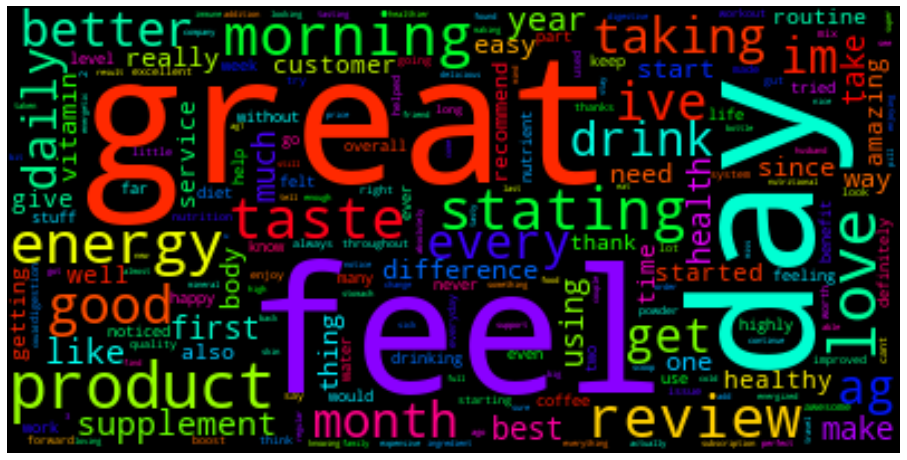

In [36]:
list_words = []

for index, row in df[df['rating_num']==5].iterrows():
    for item in row['review_clean']:
        list_words.append(item) 

from collections import Counter
dictionary=Counter(list_words)
import matplotlib.pyplot as plt
from wordcloud import WordCloud


df_words = pd.DataFrame.from_dict(dictionary, orient='index').reset_index()
df_words.rename(columns={'index': 'word', 0 : 'count'}, inplace=True)

df_words.sort_values(by='count', ascending=False, inplace=True)


# plt.plot(df_words['word'], df_words['count'])
# plt.show()
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

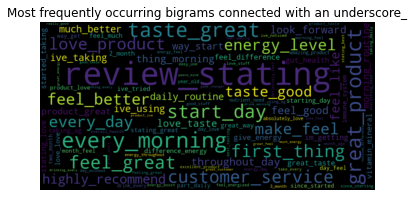

In [37]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter

# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(list_words)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)

scoredList = sorted(scored, key=itemgetter(1), reverse=True)

word_dict = {}
 
listLen = len(scoredList)
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 500
WC_width = 1000
WC_max_words = 100
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
 
wordCloud.generate_from_frequencies(word_dict)
plt.title('Most frequently occurring bigrams connected with an underscore_')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
print(df[df['review'].str.contains('review stating')]['review'])

20      great product. i been getting alot of energy e...
24      as a follower and fan of the huberman lab, i t...
33      love this and knowing i'm getting all my vitam...
50      i am in my early 60s, and since i started maki...
62      my family has been using another powdered vita...
                              ...                        
8246    athletic greens is an amazing product and comp...
8262    i’ve been enjoying athletic green for years. i...
8267    i've been using this for almost a decade now, ...
8269    the athletic greens drink is delicious and nut...
8273    i love starting my morning with athletic green...
Name: review, Length: 777, dtype: object


In [ ]:
df.to_csv(DATA_INTER_FILE)

PermissionError: [Errno 13] Permission denied: 'data\\main_processed.csv'